# Biodiversity in National Parks


## Introduction
The project goal is to analyze biodiversity of species in National Parks of United States of America. 

This will help to practice wrangling, tidying, visualisation and presentation of the data.

Question raised for the analysis:
+ Is there are significant difference of observations in National parks?
+ Which animal categories are mostly observed in each of parks?
+ Which park offers highest variety of different species?
+ Are certain types of species more likely to be protected?

## Load the data
`observations.csv` and `species_info.csv` are given for this project. The data holds information about species observed over last 7 days at 4 National Parks.


In [1]:
# importing all necessary modules
# data manipulation:
import pandas as pd
import numpy as np

# data visualization:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as gno

# loading the data
observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")

print(observations.head(7))
print(species_info.head(7))


                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal    

### Summary of the data
Using different methods, familiarize with the data in each dataframe to get the better understanding how to approach it.

First touch of the data gives information about dataframes' shape, features, data types, unique values of the features, count of missing values.


`observations` df consists of 23296 rows and 3 columns (_scientific_name_ , _park_name_, _observations_).
There are 5541 unique species, which have been observed across 4 National Parks (_Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, Yellowstone National Park_).
Data types of each feature does not require change. There are no missing values in `observations` dataframe. Df is tidy and ready for analysis.


`species_info` dataframes consists of 5824 rows (each row represents unique species) and 4 columns:
+ Category - the category of animal (_Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant, Nonvascular Plant_)
+ Scientific_name
+ Common names
+ Conservation status - is animal in _Species of Concern, Endangered, Threatened, In Recovery_ status.


There's no need to change any feature dtypes.
There are 5633 missing values, all of them in _Conservation status_ column. 
Those missing values respond that species are not in any kind of conservation.
96.72% of species are "Not protected". NaN changed to "Not under protection"


Observations dataframe size:
(23296, 3)

Species info dataframe size:
(5824, 4)

Observations features` dtypes:
scientific_name    object
park_name          object
observations        int64
dtype: object

Species info features` dtypes:
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

 Number of unique species in the observations dataframe: 5541

 Unique parks in the observations dataframe: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

Number of NaN values in observations dataframe: scientific_name    0
park_name          0
observations       0
dtype: int64

 Species info dataframe includes these unique categories: 
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

 Unique conservation statuses are : [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']

Number of NaN values in specie

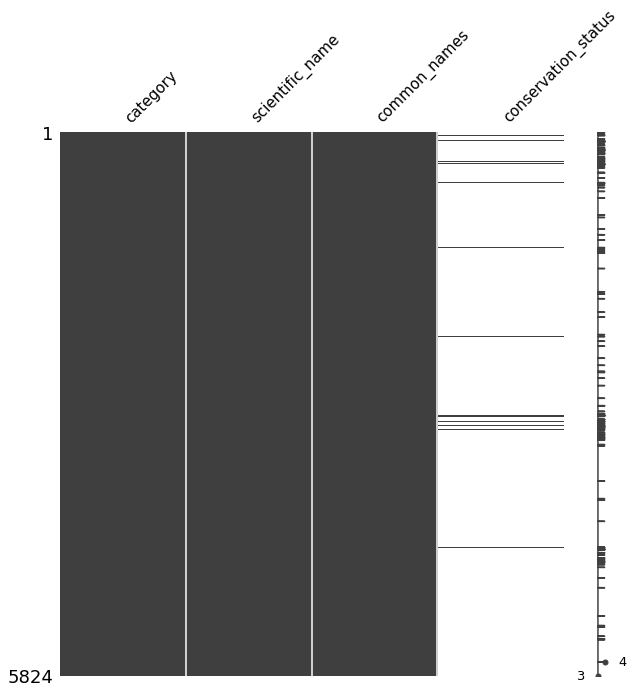

In [2]:
# size of each data frame
print("Observations dataframe size:")
print(observations.shape)
print("\nSpecies info dataframe size:")
print(species_info.shape)

# Data types of features
print("\nObservations features` dtypes:")
print(observations.dtypes)
print("\nSpecies info features` dtypes:")
print(species_info.dtypes)

# Observations dataframe:
unique_species = observations.scientific_name.nunique()
print("\n Number of unique species in the observations dataframe: " +str(unique_species))
unique_parks = observations.park_name.unique()
print("\n Unique parks in the observations dataframe: " + str(unique_parks))

obs_nNan = observations.isna().sum()
print("\nNumber of NaN values in observations dataframe: " + str(obs_nNan))

# Species info dataframe:
species_categories = species_info.category.unique()
print("\n Species info dataframe includes these unique categories: \n" + str(species_categories))
conservation_statuses = species_info.conservation_status.unique()
print("\n Unique conservation statuses are : " + str(conservation_statuses))
spc_nNan = species_info.isna().sum()
print("\nNumber of NaN values in species dataframe: " + str(spc_nNan))

# graphic of missing NaN values in species_info df
gno.matrix(species_info, figsize = (10,10), fontsize = 15, color = (0.25, 0.25, 0.25))

missing_values_ratio = (species_info.conservation_status.isna().sum() / len(species_info) * 100)
print(str(round(missing_values_ratio,2)) + ("% of conservation status values are missing"))

# filling NaN with "Not under protection".
species_info = species_info.fillna("Not under protection")



## Is there are significant difference of observations in National parks?
There is a significant difference of observations between all National Parks. Most observations are registered at Yellowstone National Park, least at Great Smoky Mountains National Park.

However, this calculation does not have significant statistical value, because it is not given the area size of each National park. It would be more precisely to estimate difference of observations per square kilometer.

                             park_name  observations
0                  Bryce National Park        576025
1  Great Smoky Mountains National Park        431820
2            Yellowstone National Park       1443562
3               Yosemite National Park        863332
                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
               group1                              group2               meandiff p-adj  lower    upper   reject
---------------------------------------------------------------------------------------------------------------
                Bryce National Park Great Smoky Mountains National Park -24.7605 0.001 -25.7791 -23.7419   True
                Bryce National Park           Yellowstone National Park  148.959 0.001 147.9404 149.9776   True
                Bryce National Park              Yosemite National Park  49.3316 0.001  48.3129  50.3502   True
Great Smoky Mountains National Park           Yellowstone Natio

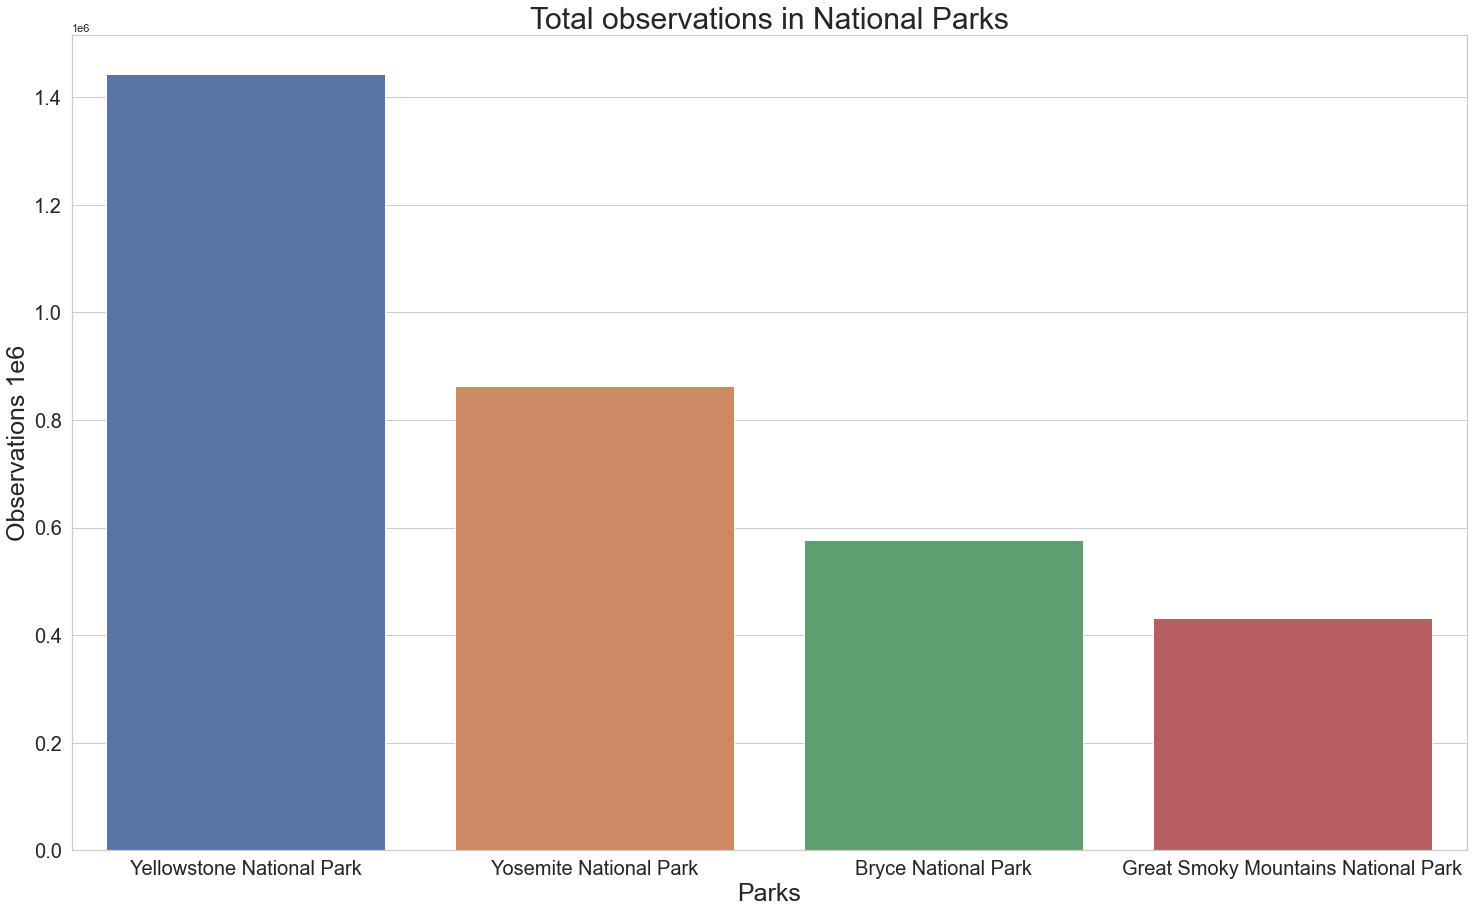

In [3]:
# observations by park 
grouped = observations.groupby(by="park_name").sum("observations").reset_index()
print(grouped)
# side by side bar plots
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(25,15))
ax = sns.barplot(x="park_name", y="observations",
                 data=grouped, order=grouped.sort_values('observations', ascending = False).park_name)
ax.set_xlabel("Parks", fontsize = 25)
ax.set_ylabel("Observations 1e6", fontsize = 25)
ax.tick_params(labelsize=20)
ax.set_title("Total observations in National Parks", fontsize = 30)

# is difference between observations in parks significant?
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(observations.observations, observations.park_name, 0.05)
print(tukey_results)

## Which animal categories are mostly observed in each of parks?

Most observed categories are:
1. Vascular plants - around 76% of each park observations
2. Birds - close to 10%
3. Nonvascular plants


Amphibian and reptile categories are least observed.

In [4]:
# subset of species_info
scientific_category = species_info[["category", "scientific_name", 
                                    "common_names", "conservation_status"]]

# observations and scientific_category (subset of species_info) merge
observations_wcategory = pd.merge(observations, scientific_category, on=['scientific_name'], how='inner')

# observations_wcategory grouped by park_name and category 
observations_parkCategory = observations_wcategory.groupby(['park_name','category']).\
    sum("observations").sort_values(by=["park_name","observations"]).reset_index()

# observations of categories in parks without Vascular Plant
observations_parkCategory_notvascular = observations_parkCategory[observations_parkCategory.category
                                                                  != "Vascular Plant"]
# subset of parks
def subset_park(parkname):
    park_df = observations_parkCategory[observations_parkCategory.park_name == parkname].reset_index()
    park_df["observation_ratio"] = park_df.observations / park_df.observations.sum() * 100
    park_df = park_df.drop(columns= ["index"])
    return park_df

bryce = subset_park("Bryce National Park")
smoky = subset_park("Great Smoky Mountains National Park")
yellow = subset_park("Yellowstone National Park")
yosemite = subset_park("Yosemite National Park")

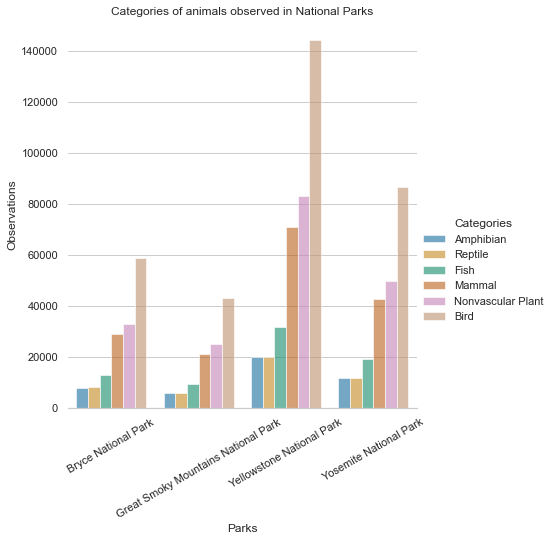

In [5]:
g = sns.catplot(
    data=observations_parkCategory_notvascular, kind="bar",
    x="park_name", y="observations", hue="category",
    ci="sd", palette="colorblind", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("Parks", "Observations")
g.legend.set_title("Categories")
plt.title("Categories of animals observed in National Parks")
g.set_xticklabels(rotation=30)

## Which park offers highest variety of different species?
All parks offer the same amount of 5541 unique species to observe.

In [6]:
most_species = observations.groupby(['park_name']).\
    nunique("scientific_name").reset_index()
print(most_species)

                             park_name  scientific_name  observations
0                  Bryce National Park             5541           142
1  Great Smoky Mountains National Park             5541           129
2            Yellowstone National Park             5541           149
3               Yosemite National Park             5541           151


## Are certain types of species more likely to be protected?
Mammals and birds are more likely to be protected than other types of species.
17% protection rate for Mammals and 15% for Birds.

Least protected are vascular and nonvascular both taking around 1% protection rate.

In [7]:
# table with conservation status and species counts of each category
statuses = species_info.groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

statuses

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Not under protection,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In [12]:
# creating new column "Is protected", true if != "Not under protection"
species_info["protected"] = species_info.conservation_status != "Not under protection"

protected_species = species_info.groupby(["category", "protected"])\
    .scientific_name.nunique()\
    .reset_index()\
        .pivot(columns='protected',
                index='category',
                values='scientific_name')\
                        .reset_index()
protected_species.columns = ['category', 'not_protected', 'protected']

protected_species["protection_ratio"] = protected_species.protected / (protected_species.protected\
    + protected_species.not_protected) * 100

protected_species

,category,not_protected,protected,protection_ratio
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


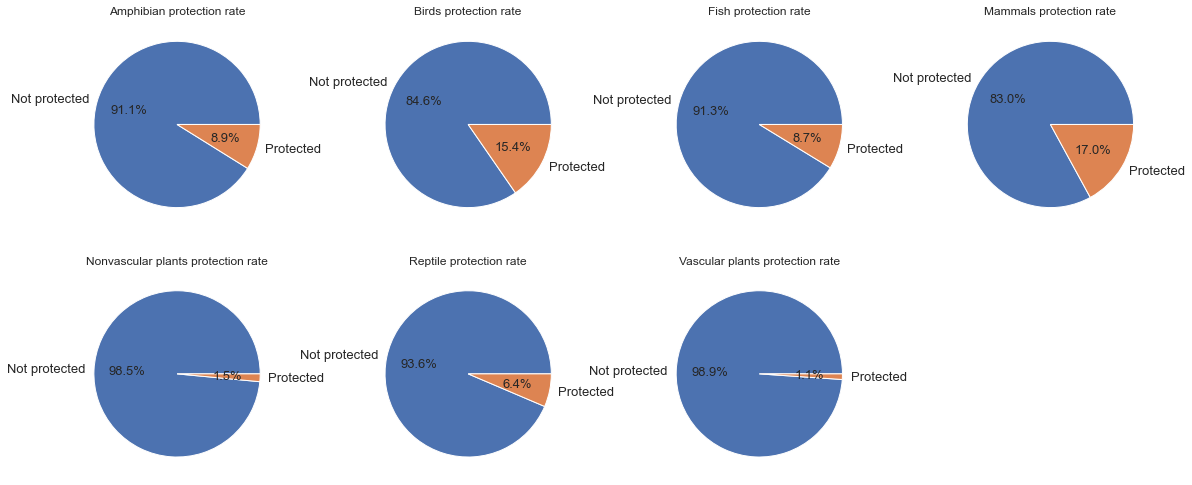

In [31]:
amph = [72,7]
labels=["Not protected", "Protected"]
bird = [413,75]
Fish = [115,11]
mam = [146,30]
nonvas = [328,5]
reptile = [73,5]
vascul = [4216,46]


plt.figure(figsize=(20,13))
plt.subplot(3,4,1)
plt.pie(amph, labels = labels, autopct = "%1.1f%%",textprops={'fontsize': 13})
plt.title("Amphibian protection rate")

plt.subplot(3,4,2)
plt.pie(bird,labels = labels, autopct = "%1.1f%%", textprops={'fontsize': 13})
plt.title("Birds protection rate")

plt.subplot(3,4,3)
plt.pie(Fish, labels = labels, autopct = "%1.1f%%",textprops={'fontsize': 13})
plt.title("Fish protection rate")

plt.subplot(3,4,4)
plt.pie(mam, labels = labels, autopct = "%1.1f%%",textprops={'fontsize': 13})
plt.title("Mammals protection rate")

plt.subplot(3,4,5)
plt.pie(nonvas, labels = labels, autopct = "%1.1f%%",textprops={'fontsize': 13})
plt.title("Nonvascular plants protection rate")

plt.subplot(3,4,6)
plt.pie(reptile, labels = labels, autopct = "%1.1f%%",textprops={'fontsize': 13})
plt.title("Reptile protection rate")

plt.subplot(3,4,7)
plt.pie(vascul, labels = labels, autopct = "%1.1f%%",textprops={'fontsize': 13})
plt.title("Vascular plants protection rate")


plt.show()



### Statistical significance
`Mammals` and `Reptiles` have significant different ratios of protection. It's more likely that Mammal species will be protected than reptiles.

In [50]:
# chi2 test to see if there`s significant difference between types of species protection rate
amph_bird = [[7,72], [75,413]]
mam_reptile = [[30,146], [5,75]]
amph_fish = [[7,72], [11,115]]

from scipy.stats import chi2_contingency
# amphibians and birds
chi2, pval, dof, expected = chi2_contingency(amph_bird)
amph_bird_pval = pval
print(amph_bird_pval)

# mammals and reptiles
chi2, pval, dof, expected = chi2_contingency(mam_reptile)
mam_rept_pval = pval
print(mam_rept_pval)

# amphibian and fish
chi2, pval, dof, expected = chi2_contingency(amph_fish)
amph_fish_pval = pval
print(amph_fish_pval)


0.17593613249594683
0.0328293818820224
0.8247942981524834


## Summary

Project helped to practice data maniplation and visualisation methods.

The answers for set question were responded.

For future it would be useful to inspect differences over time.